# Association Rules :
***Problem Statement :***
- Prepare association rule for the given dataset. 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values.
2) Change the minimum length in apriori algorithm.
3) Visulize the obtained rules using different plots. 


In [2]:
# Importing usefull libraries
import pandas as pd
import numpy as np
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from scipy.special import comb
from itertools import combinations, permutations
from mpl_toolkits.mplot3d import Axes3D

# Ignore anoying warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Importing given dataset
book_df = pd.read_csv("book.csv")

# Showing first 5 rows from given dataset
book_df.head()

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0


In [4]:
# Dimensions of dataset
book_df.shape

(2000, 11)

In [5]:
# Checking null values present in given dataset
book_df.isnull().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [6]:
# Summary of given dataset
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [7]:
# Checking basic stats about given dataset
book_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


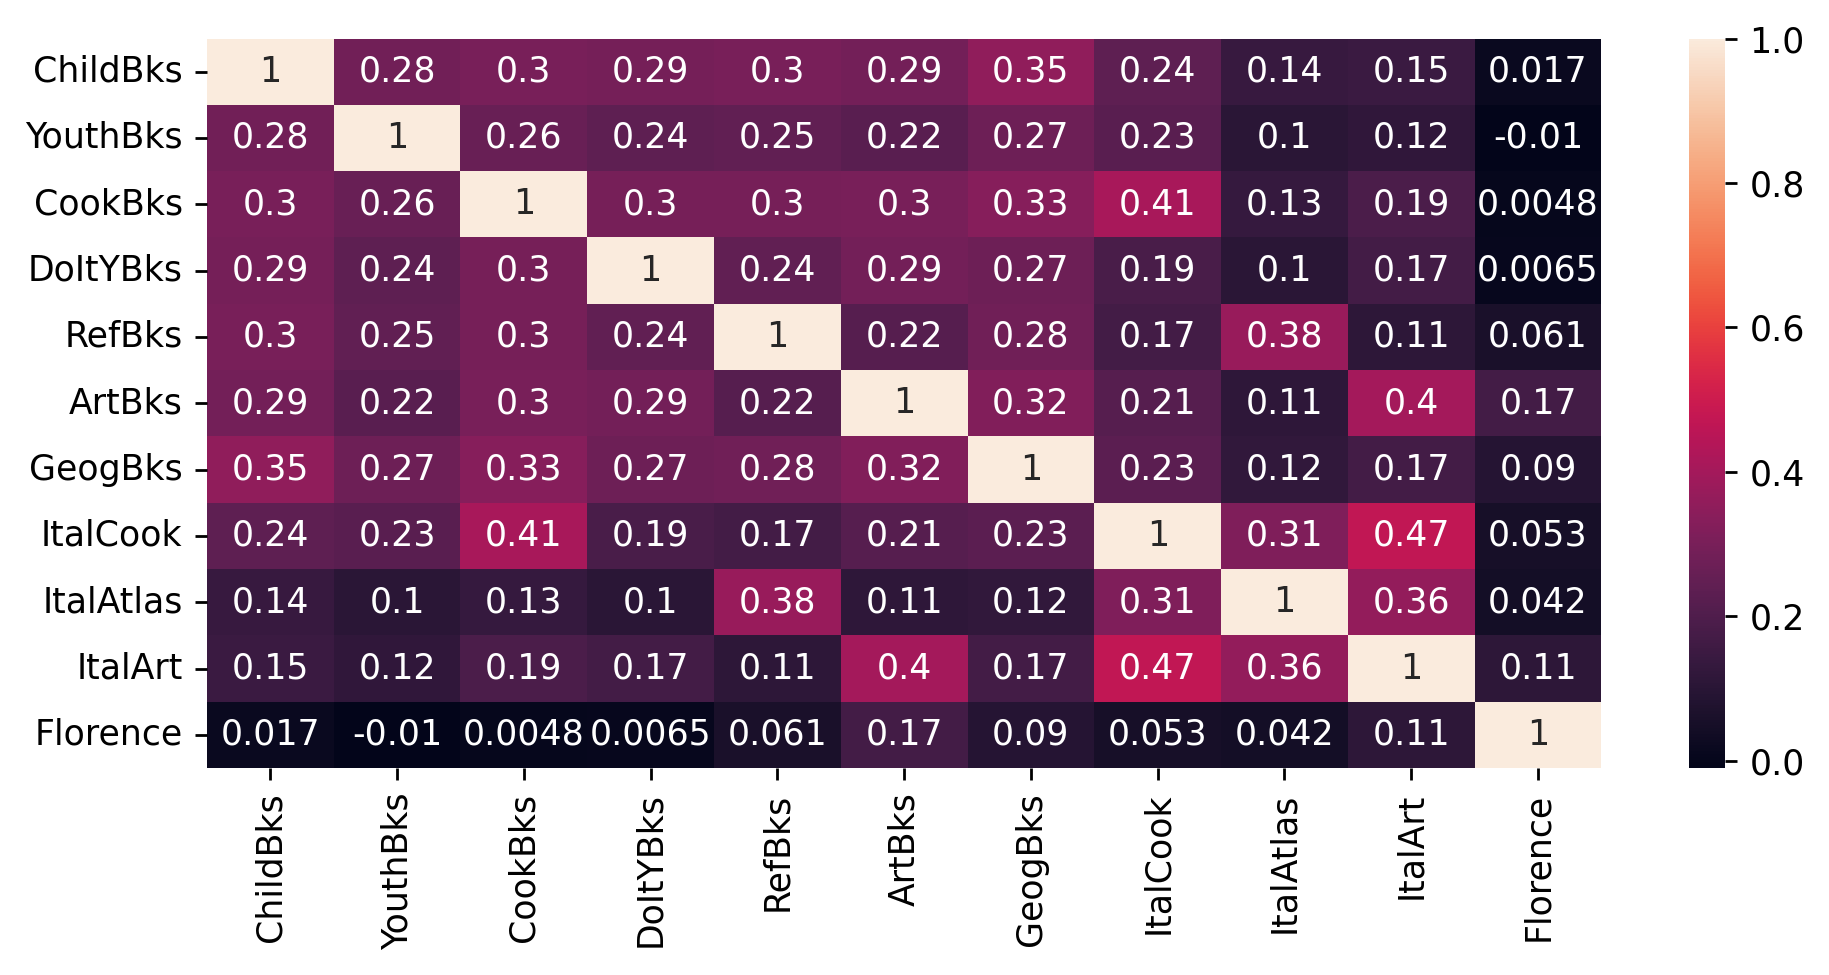

In [8]:
# Correlation matrix
plt.figure(figsize=(8,4),dpi=250)
sns.heatmap(book_df.corr(),annot=True)
plt.tight_layout()
plt.show()

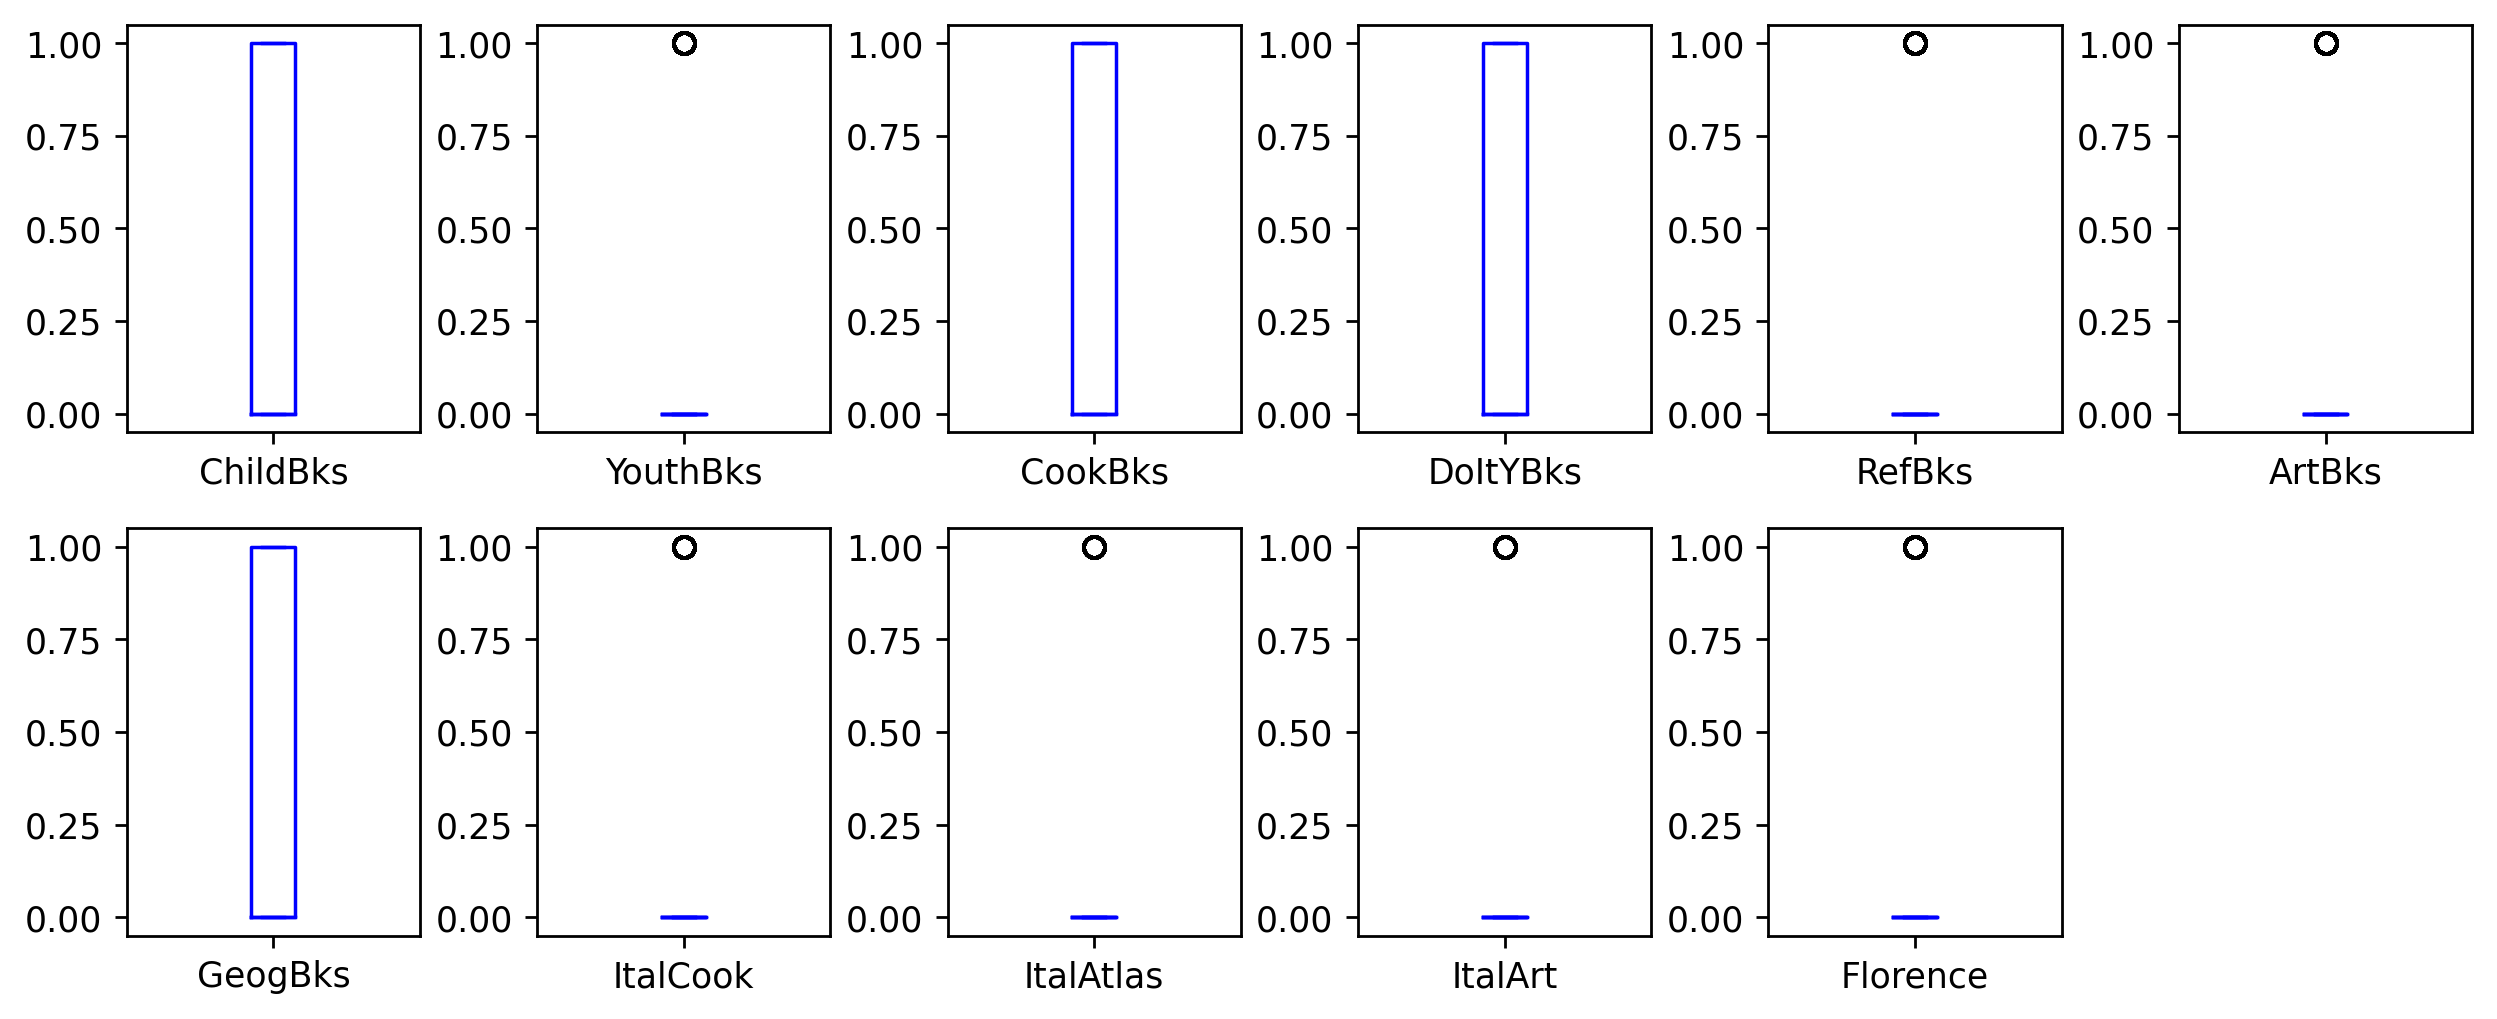

In [9]:
# To reinforce our insights about the data symmetry and their outliers, we can plot some boxplots
plt.rcParams['figure.dpi']=250
book_df.plot(kind='box', subplots=True, layout=(6,6),figsize=(10,12), sharex=False, sharey=False, color='blue')
plt.tight_layout()
plt.show()

***Performing encoding on gieven dataset :***

In [11]:
item_sets = {}

te = TransactionEncoder()
te_ary = te.fit(book_df).transform(book_df)

# Creating dataframe for encoded dataset
ap = pd.DataFrame(te_ary, columns=te.columns_)
ap

,A,B,C,D,F,G,I,R,Y,a,...,h,i,k,l,n,o,r,s,t,u
0,False,True,True,False,False,False,False,False,False,False,...,True,True,True,True,False,False,False,True,False,False
1,False,True,False,False,False,False,False,False,True,False,...,True,False,True,False,False,True,False,True,True,True
2,False,True,True,False,False,False,False,False,False,False,...,False,False,True,False,False,True,False,True,False,False
3,False,True,False,True,False,False,True,False,True,False,...,False,False,True,False,False,True,False,True,True,False
4,False,True,False,False,False,False,False,True,False,False,...,False,False,True,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


# Apriori Algorithm :

In [12]:
ap_0_5 = {}
ap_1 = {}
ap_5 = {}
ap_1_0 = {}

In [13]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [14]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(book_df,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [15]:
confs = []

In [16]:
for i in [0.001,0.005,0.01,0.05,0.1]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    confs.append(ap_i)

In [17]:
all_conf = pd.concat(confs,axis=1)

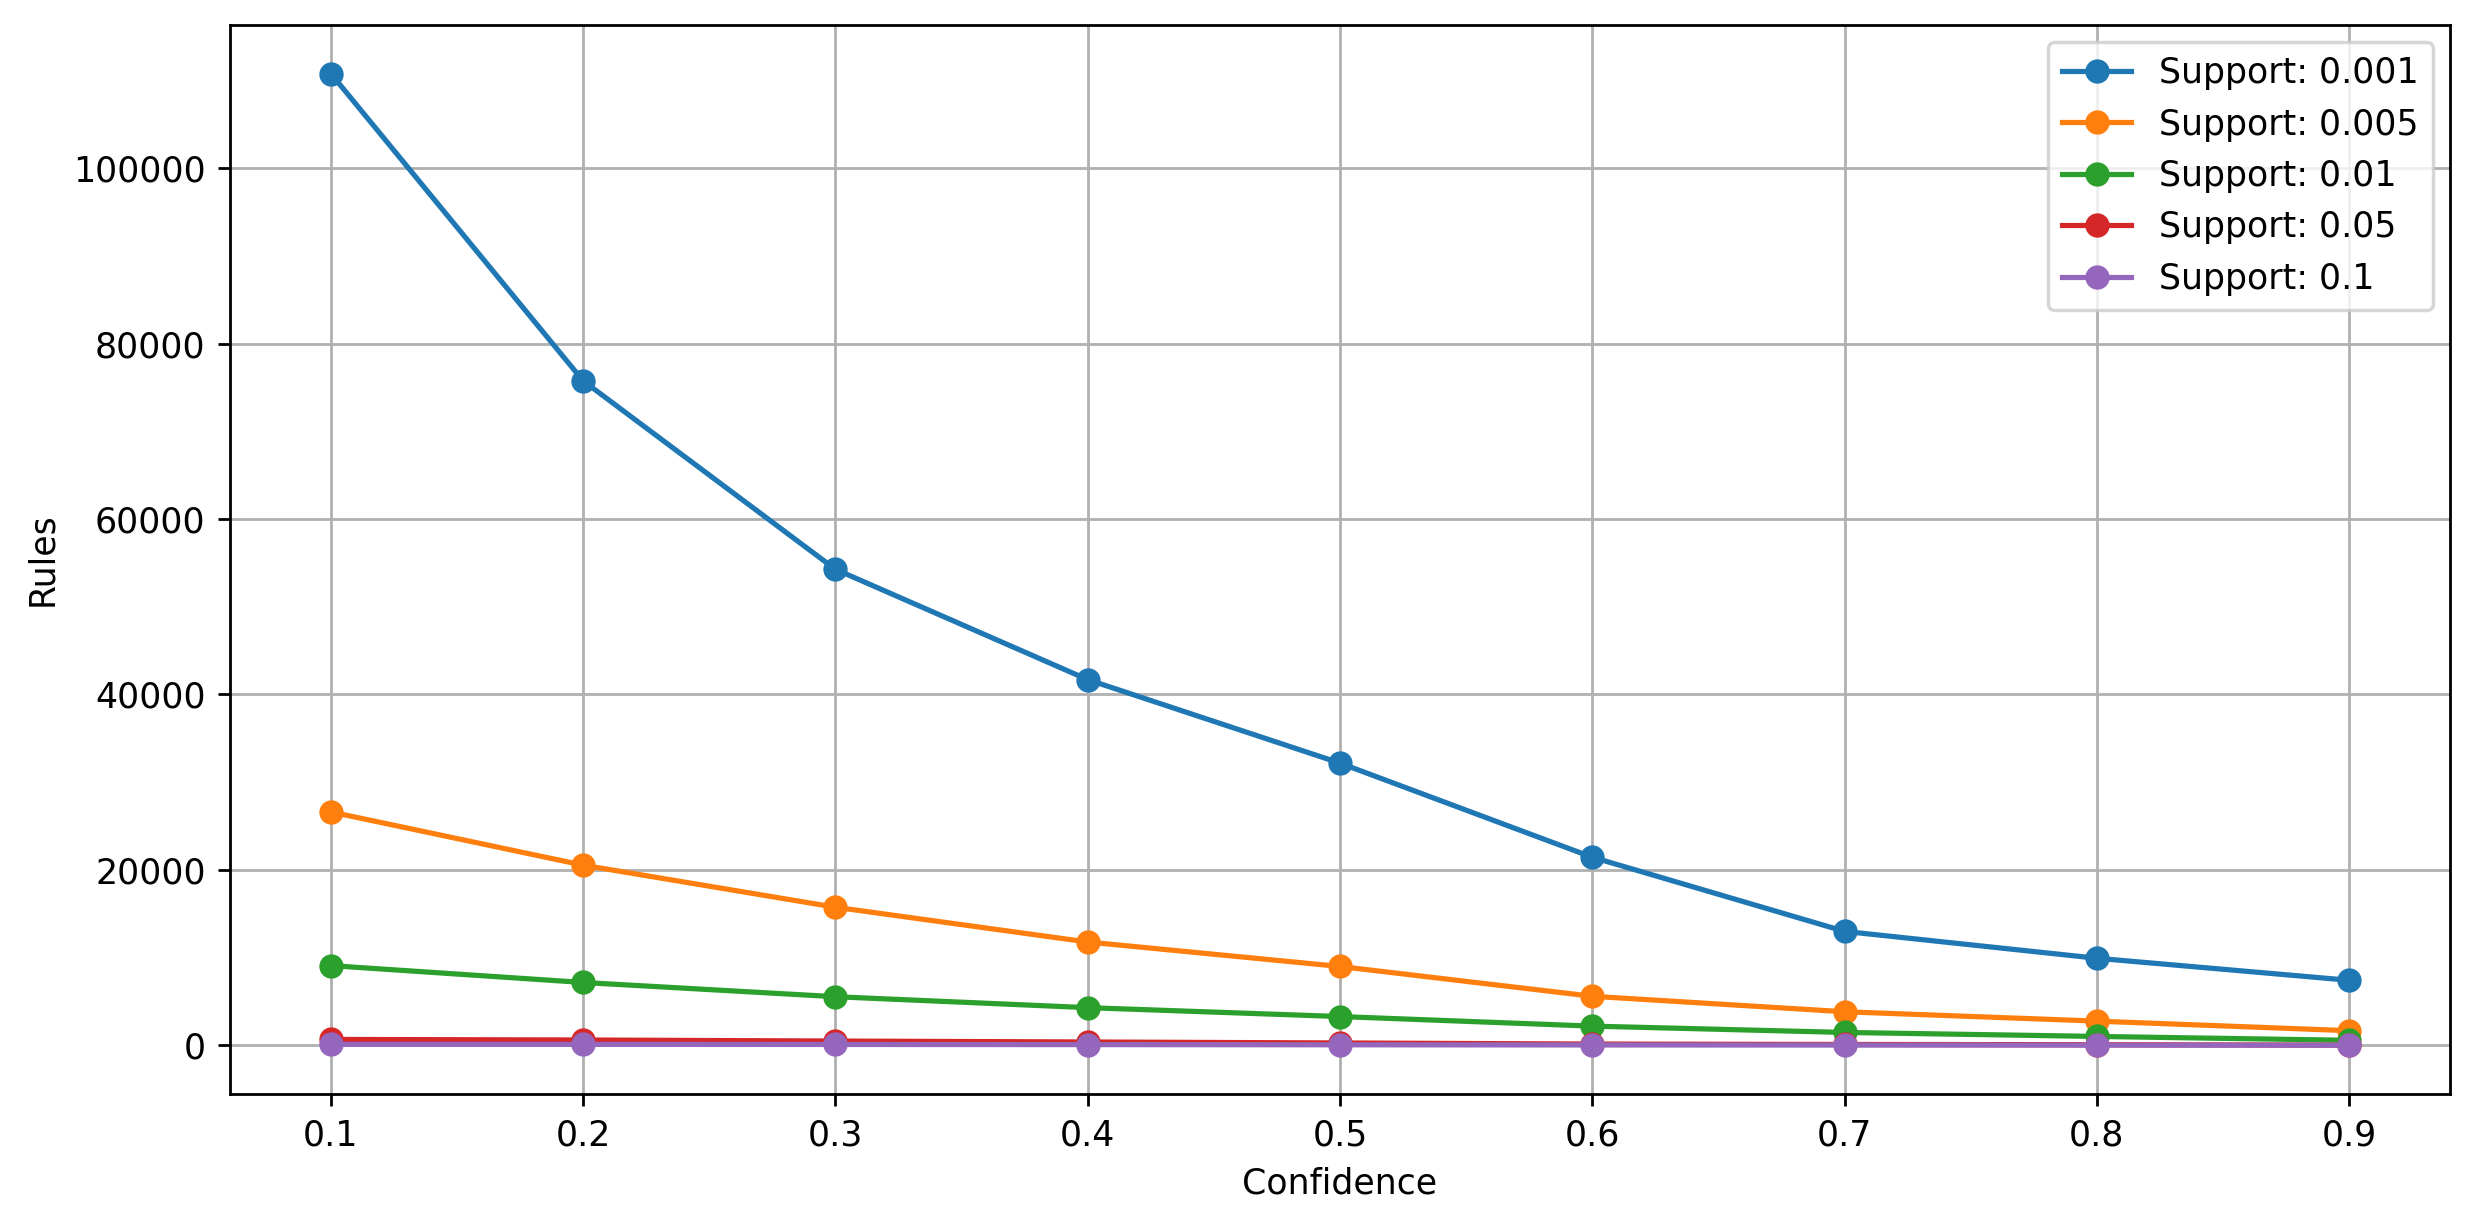

In [18]:
all_conf.plot(figsize=(10,5),grid=True,marker='o')
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.tight_layout()
plt.show()

- Lower the Confidence level Higher the no. of rules.  
- Higher the Support, lower the no. of rules.

# 1) Association Rule :
***Lets try with support 0.001 & confidence at 0.4***

In [21]:
# Apriori algorithm
apriori_1 =  apriori(ap,min_support=0.001,use_colnames=True)
apriori_1

,support,itemsets
0,0.0015,(A)
1,0.0035,(B)
2,0.0015,(C)
3,0.0020,(I)
4,0.0010,(Y)
...,...,...
135,0.0010,"(t, s, Y, k, B)"
136,0.0010,"(t, s, Y, o, B)"
137,0.0010,"(t, s, o, k, B)"
138,0.0010,"(t, s, Y, o, k)"


In [23]:
# Generating association rule
rule_1 = association_rules(apriori_1,min_threshold=0.4,support_only=False)
rule_1

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A),(I),0.0015,0.0020,0.001,0.666667,333.333333,0.000997,2.9940
1,(I),(A),0.0020,0.0015,0.001,0.500000,333.333333,0.000997,1.9970
2,(A),(a),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
3,(a),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
4,(A),(l),0.0015,0.0025,0.001,0.666667,266.666667,0.000996,2.9925
...,...,...,...,...,...,...,...,...,...
743,"(k, Y)","(o, B, t, s)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
744,"(B, Y)","(o, k, t, s)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
745,"(o, k)","(B, t, Y, s)",0.0025,0.0010,0.001,0.400000,400.000000,0.000998,1.6650
746,"(B, o)","(k, t, Y, s)",0.0020,0.0010,0.001,0.500000,500.000000,0.000998,1.9980


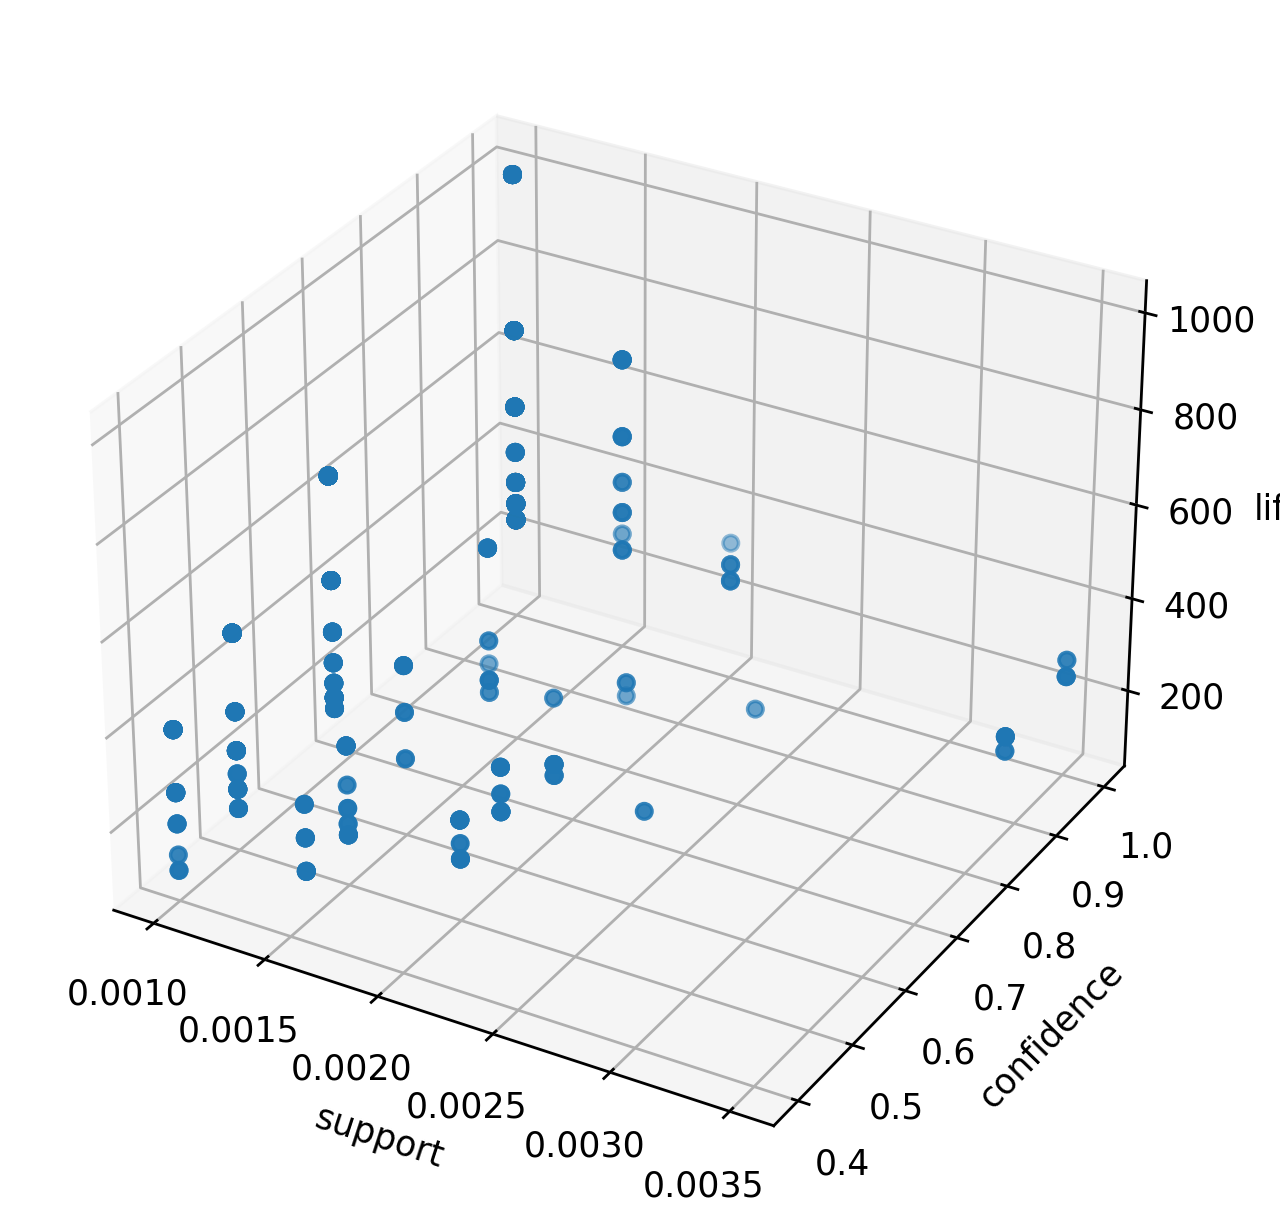

In [27]:
# Visualizing first association rule
support = rule_1["support"]
confidence =  rule_1["confidence"]
lift = rule_1["lift"]

fig1 = plt.figure(figsize=(5,5))
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")
plt.tight_layout()
plt.show()

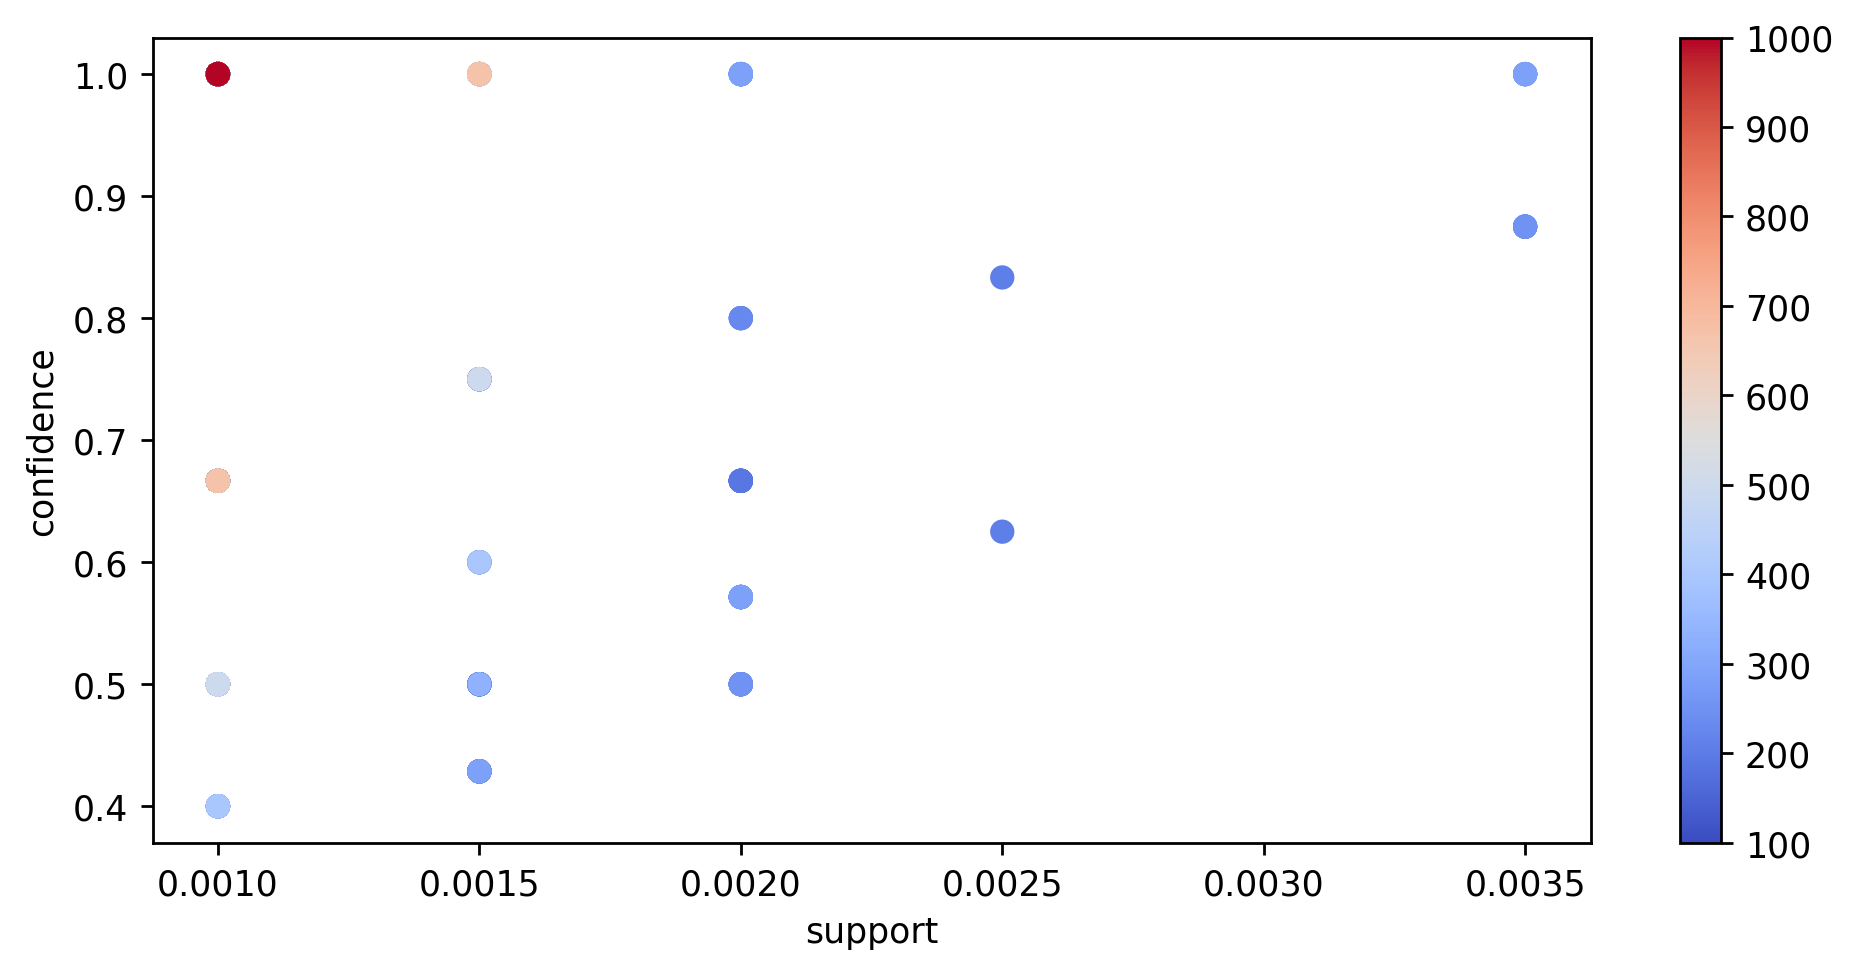

In [30]:
plt.figure(figsize=(8,4),dpi=250)
plt.scatter(support,confidence, c=lift, cmap='coolwarm')
plt.colorbar()
plt.xlabel("support")
plt.ylabel("confidence")
plt.tight_layout()
plt.show()

# 2) Association Rule :
- Lets try with support = 0.0007 & confidence (min_threshold) = 0.1

In [40]:
# Apriori algorithm
apriori_2 = apriori(ap,min_support=0.0007,use_colnames=True)
apriori_2

,support,itemsets
0,0.0015,(A)
1,0.0035,(B)
2,0.0015,(C)
3,0.0020,(I)
4,0.0010,(Y)
...,...,...
135,0.0010,"(t, s, Y, k, B)"
136,0.0010,"(t, s, Y, o, B)"
137,0.0010,"(t, s, o, k, B)"
138,0.0010,"(t, s, Y, o, k)"


In [41]:
# Generating association rule
rule_2 = association_rules(apriori_2,min_threshold=0.1,support_only=False)
rule_2

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(A),(I),0.0015,0.0020,0.001,0.666667,333.333333,0.000997,2.9940
1,(I),(A),0.0020,0.0015,0.001,0.500000,333.333333,0.000997,1.9970
2,(A),(a),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
3,(a),(A),0.0015,0.0015,0.001,0.666667,444.444444,0.000998,2.9955
4,(A),(l),0.0015,0.0025,0.001,0.666667,266.666667,0.000996,2.9925
...,...,...,...,...,...,...,...,...,...
979,(s),"(t, Y, o, k, B)",0.0040,0.0010,0.001,0.250000,250.000000,0.000996,1.3320
980,(Y),"(t, s, o, k, B)",0.0010,0.0010,0.001,1.000000,1000.000000,0.000999,inf
981,(o),"(t, Y, s, k, B)",0.0030,0.0010,0.001,0.333333,333.333333,0.000997,1.4985
982,(k),"(t, Y, s, o, B)",0.0040,0.0010,0.001,0.250000,250.000000,0.000996,1.3320


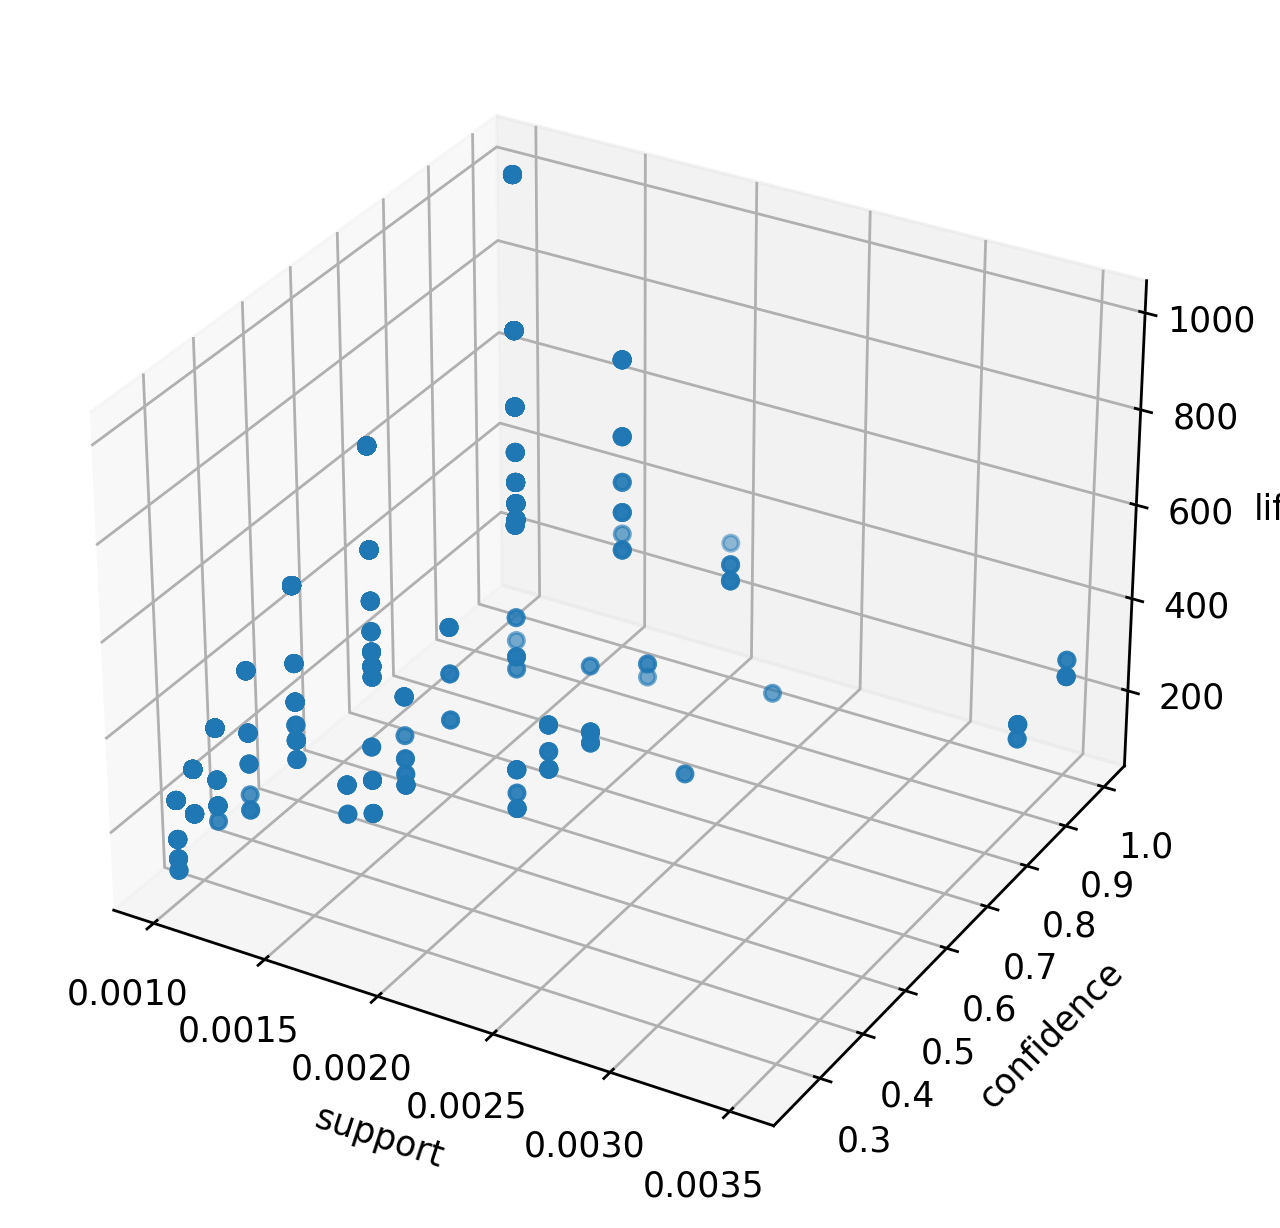

In [42]:
# Visualizing second association rule

support = rule_2["support"]
confidence =  rule_2["confidence"]
lift = rule_2["lift"]

fig1 = plt.figure(figsize=(5,5),dpi=250)
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")
plt.tight_layout()
plt.show()

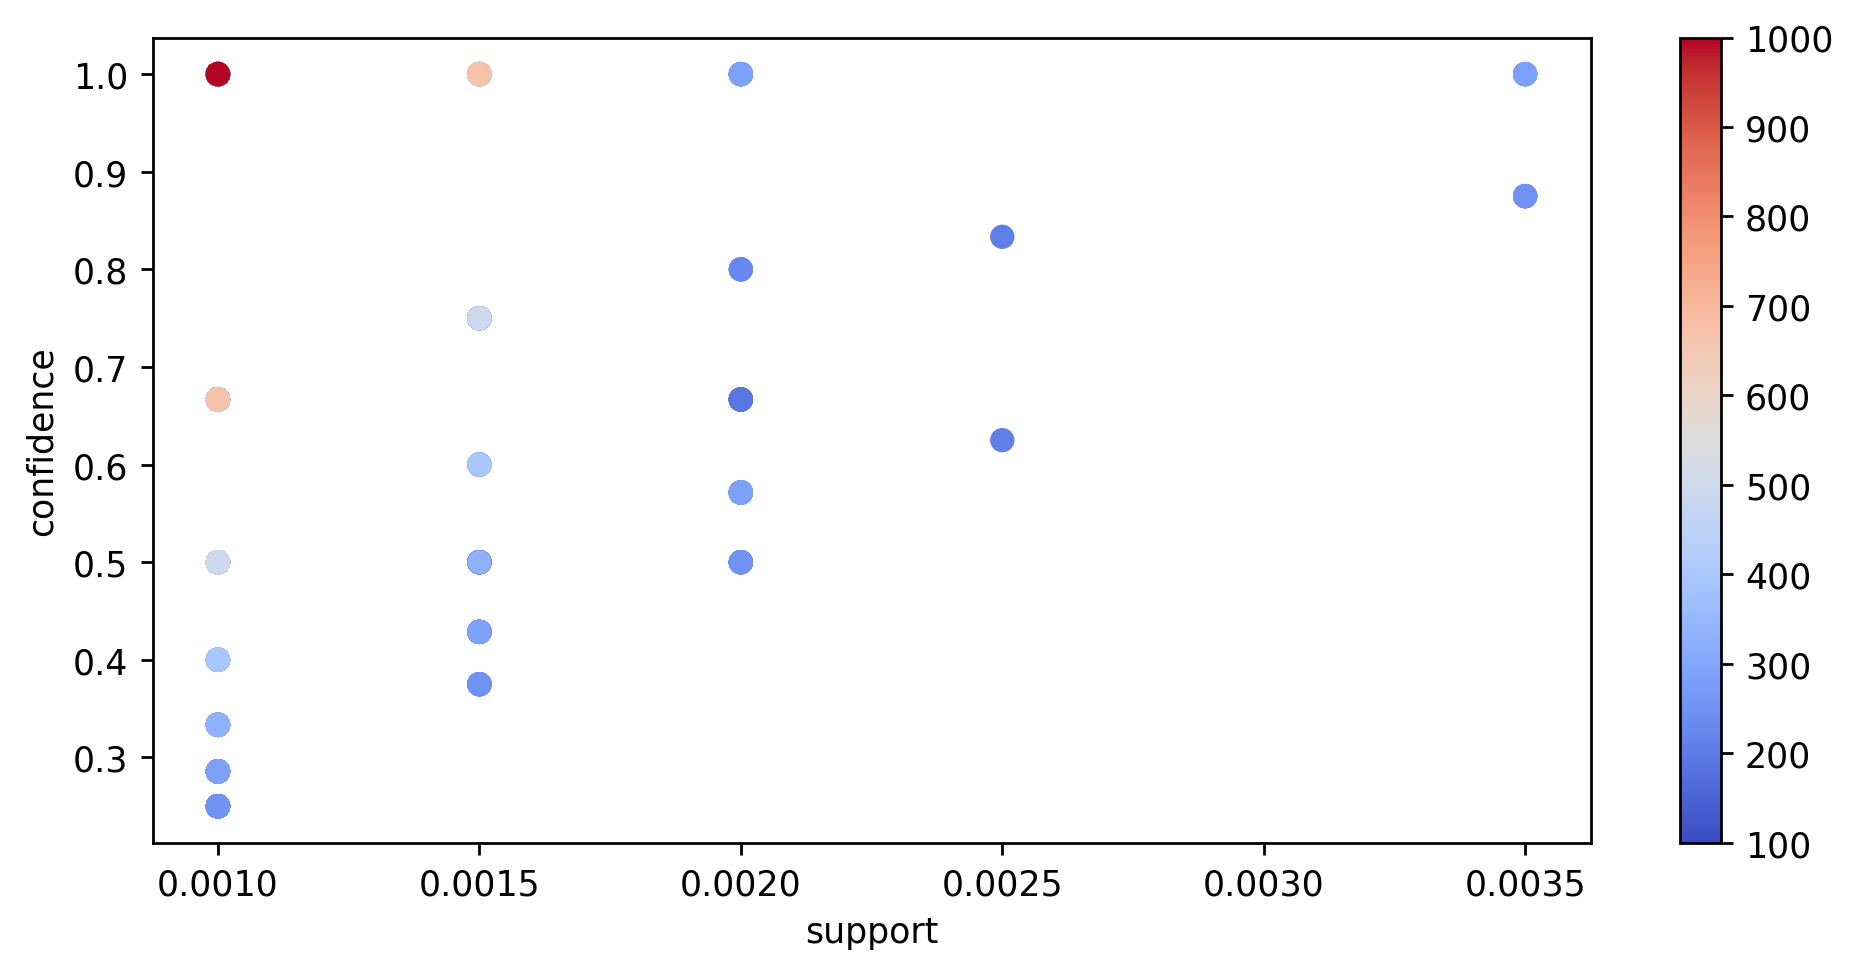

In [43]:
plt.figure(figsize=(8,4),dpi=250)
plt.scatter(support,confidence, c=lift, cmap='coolwarm')
plt.colorbar()
plt.xlabel("support")
plt.ylabel("confidence")
plt.tight_layout()
plt.show()